In [371]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

In [372]:
def rmspe(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))

    return loss

def create_date_features(df):
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df['Month'] = pd.to_datetime(df['Date']).dt.month
    df['Day'] = pd.to_datetime(df['Date']).dt.day
    df['DayOfWeeks'] = pd.to_datetime(df['Date']).dt.dayofweek
    df['DayOfyear'] = pd.to_datetime(df['Date']).dt.dayofyear
    df['Week'] = pd.to_datetime(df['Date']).dt.week 
    df['Quarter'] = pd.to_datetime(df['Date']).dt.quarter  
    df['Is_month_start'] = pd.to_datetime(df['Date']).dt.is_month_start 
    df['Is_month_end'] = pd.to_datetime(df['Date']).dt.is_month_end 
    df['Is_quarter_start'] = pd.to_datetime(df['Date']).dt.is_quarter_start
    df['Is_quarter_end'] = pd.to_datetime(df['Date']).dt.is_quarter_end 
    df['Is_year_start'] = pd.to_datetime(df['Date']).dt.is_year_start 
    df['Is_year_end'] = pd.to_datetime(df['Date']).dt.is_year_end
    df['Semester'] = np.where(df['Quarter'].isin([1,2]),1,2)
    df['Is_weekend'] = np.where(df['DayOfWeeks'].isin([5,6]),1,0)
    df['Is_weekday'] = np.where(df['DayOfWeeks'].isin([0,1,2,3,4]),1,0)
    df['Days_in_month'] = pd.to_datetime(df['Date']).dt.days_in_month 
    return df

In [373]:
train=pd.read_csv("train.csv",parse_dates=True)
test=pd.read_csv("test.csv",parse_dates=True)
store=pd.read_csv("store.csv")
print("Shapes of DataFrames\ntrain:{}\ntest:{}\nstore:{}".format(train.shape,test.shape,store.shape))

Shapes of DataFrames
train:(1017209, 9)
test:(41088, 8)
store:(1115, 10)


In [374]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [375]:
train=create_date_features(train)
test=create_date_features(test)

In [347]:
train["Sales"].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

<IPython.core.display.Javascript object>


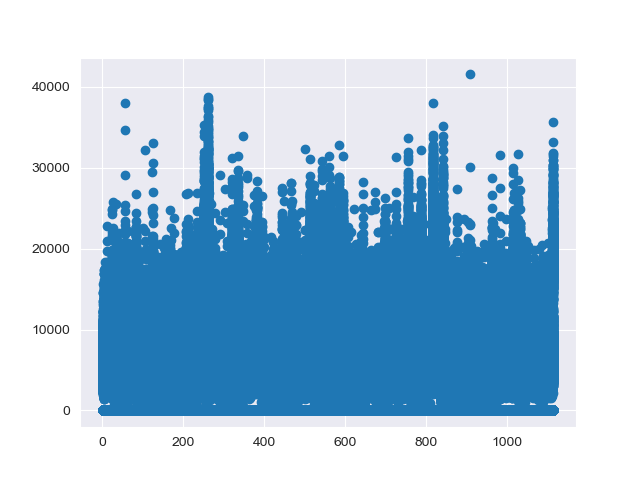

In [376]:
%matplotlib notebook
plt.scatter(train.Store,train.Sales)#analyzing sales of each store visually we can see outliers and zero values


<IPython.core.display.Javascript object>


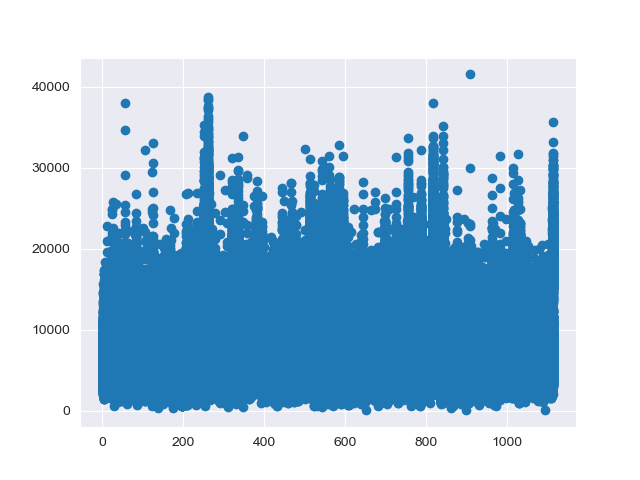

In [377]:
train=train[train["Sales"]>1]#taking sales value that are not zero
%matplotlib notebook
plt.scatter(train.Store,train.Sales)

In [378]:
from scipy import stats
%matplotlib notebook
import numpy as np
#find z_score of sales of each store individually.
for i in range(1,len(train["Store"].unique())+1):
    z=np.abs(stats.zscore(train.loc[train['Store'] == i]["Sales"]))
    train.loc[train['Store'] == i, 'z_score'] =z


<IPython.core.display.Javascript object>


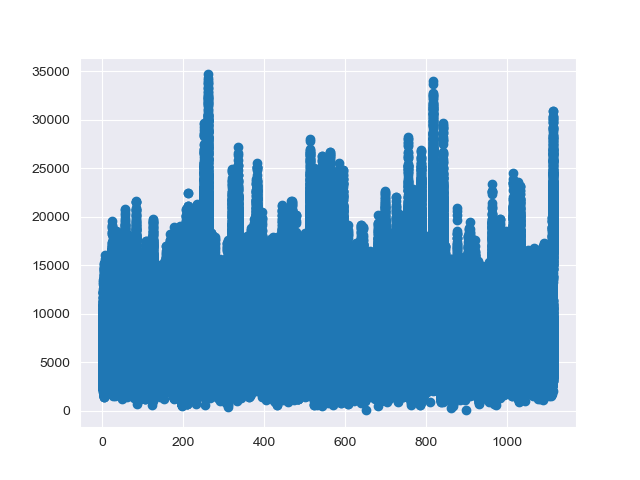

In [351]:
#removing data entries with z_score more than or equal to 3
train=train[train.z_score<3]#removing outliers improved the results
%matplotlib notebook
plt.scatter(train.Store,train.Sales)

In [352]:
def DataTypes(train):
    dataTypeSeries = train.dtypes
    print('Data type of each column of Dataframe :')
    print(dataTypeSeries)
DataTypes(train)#check for all datatypes to avoid errors later on

Data type of each column of Dataframe :
Store                        int64
DayOfWeek                    int64
Date                datetime64[ns]
Sales                        int64
Customers                    int64
Open                         int64
Promo                        int64
StateHoliday                object
SchoolHoliday                int64
Year                         int64
Month                        int64
Day                          int64
DayOfWeeks                   int64
DayOfyear                    int64
Week                         int64
Quarter                      int64
Is_month_start                bool
Is_month_end                  bool
Is_quarter_start              bool
Is_quarter_end                bool
Is_year_start                 bool
Is_year_end                   bool
Semester                     int32
Is_weekend                   int32
Is_weekday                   int32
Days_in_month                int64
z_score                    float64
dtype: object


In [353]:
train["StateHoliday"].unique()#'0' and 0 are basically same.needs to be converted to string

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [354]:
train.loc[train["StateHoliday"]==0,"StateHoliday"]="0"
train.loc[train["StateHoliday"]=='0',"StateHoliday"]="0"
test.loc[test["StateHoliday"]==0,"StateHoliday"]="0"
test.loc[test["StateHoliday"]=='0',"StateHoliday"]="0"

In [355]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#transform strings to numbers
train["StateHoliday_num"]=le.fit_transform(train["StateHoliday"])
test["StateHoliday_num"]=le.fit_transform(test["StateHoliday"])

In [379]:
print("Rows with zero Sales:    ",len(train.loc[train["Sales"]==0]))
print("Total data_entries:  ",len(train))
# train=train.drop(train.loc[train["Sales"]==0].index)



Rows with zero Sales:     0
Total data_entries:   844338


In [382]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [383]:
#transforming the string to numbers
store["StoreType"]=le.fit_transform(store["StoreType"])
store["Assortment"]=le.fit_transform(store["Assortment"])
store.loc[(store["CompetitionDistance"].isnull())]
store["CompetitionDistance"].max()#find out max competition distance in our data set
#set nan to large value.
store.loc[store["CompetitionDistance"].isnull(),"CompetitionDistance"]=999999
# store.loc[store["CompetitionDistance"] == 999999]
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [385]:
from sklearn.preprocessing import OneHotEncoder# creating instance of one-hot-encoder
store["PromoInterval"].fillna("int",inplace=True)#putting a string at nan so that it can be encoded
print(store["PromoInterval"].unique())
#we encode promointerval for the 4 existing groups
#gives better results then labelling wit numbers here
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(store[["PromoInterval"]]).toarray())
store

['int' 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,int
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,2,2,620.0,9.0,2009.0,0,0.0,0.0,int
4,5,0,0,29910.0,4.0,2015.0,0,0.0,0.0,int
5,6,0,0,310.0,12.0,2013.0,0,0.0,0.0,int
6,7,0,2,24000.0,4.0,2013.0,0,0.0,0.0,int
7,8,0,0,7520.0,10.0,2014.0,0,0.0,0.0,int
8,9,0,2,2030.0,8.0,2000.0,0,0.0,0.0,int
9,10,0,0,3160.0,9.0,2009.0,0,0.0,0.0,int


In [384]:
store["CompetitionOpenSinceMonth"].fillna(0,inplace=True)
store["CompetitionOpenSinceYear"].fillna(0,inplace=True)
store["Promo2SinceWeek"].fillna(0,inplace=True)
store["Promo2SinceYear"].fillna(0,inplace=True)
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                544
dtype: int64

In [362]:
# store.fillna(1,inplace=True)
# if "PromoInterval" in train.columns:
store.drop(columns=["PromoInterval"],inplace=True)#drop promointerval as its not needed now


In [364]:
full_train=train.merge(store,on="Store")
full_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,0,1,2,3
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,1270.0,9.0,2008.0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,1270.0,9.0,2008.0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,1270.0,9.0,2008.0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,1270.0,9.0,2008.0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,1270.0,9.0,2008.0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [365]:
col_to_drop=['Date','StateHoliday','Customers',"Sales","DayOfWeek","z_score"]#drop irrelevent olumns
X=(full_train.drop(col_to_drop,axis=1))                 #and dayofweeks was in dataframe twice
Y=(full_train["Sales"])
full_train.columns

Index([                    'Store',                 'DayOfWeek',
                            'Date',                     'Sales',
                       'Customers',                      'Open',
                           'Promo',              'StateHoliday',
                   'SchoolHoliday',                      'Year',
                           'Month',                       'Day',
                      'DayOfWeeks',                 'DayOfyear',
                            'Week',                   'Quarter',
                  'Is_month_start',              'Is_month_end',
                'Is_quarter_start',            'Is_quarter_end',
                   'Is_year_start',               'Is_year_end',
                        'Semester',                'Is_weekend',
                      'Is_weekday',             'Days_in_month',
                         'z_score',          'StateHoliday_num',
                       'StoreType',                'Assortment',
             'Competition

In [339]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,Y,test_size=0.2,random_state = 1997)

In [80]:
#could not perform hypertuning as computer crashed every time
# from sklearn.model_selection import RandomizedSearchCV
# from pprint import pprint
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)

In [366]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
rf=RandomForestRegressor(random_state=1997,max_features=0.80,min_samples_leaf=2,n_estimators=100)
rf.fit(np.array(X),Y)# used all to train and score was 0.11886 
# print(rf.score(np.array(X_val),y_val))

# p=rf.predict(np.array(X_val))

# print('RMSPE:',rmspe(y_val,p))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1997, verbose=0, warm_start=False)

In [367]:
pprint(rf.get_params())

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 0.8,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1997,
 'verbose': 0,
 'warm_start': False}


<IPython.core.display.Javascript object>


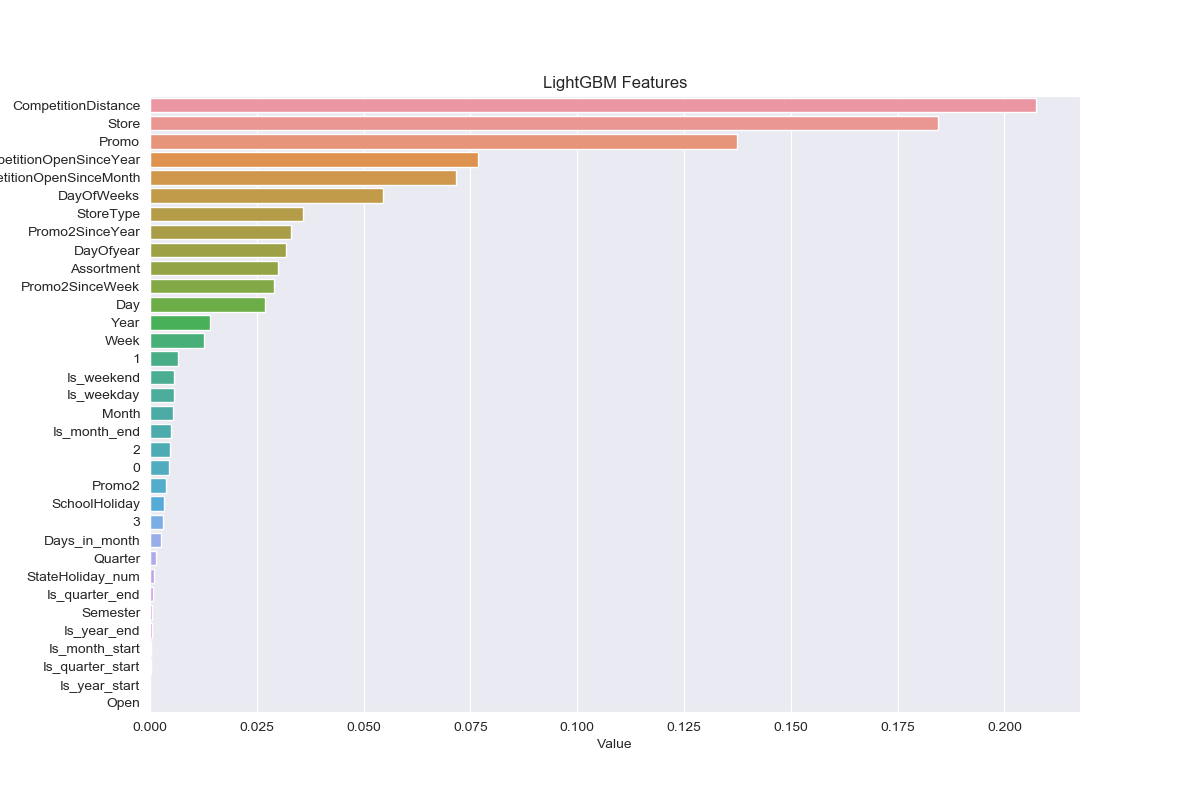

In [368]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

%matplotlib notebook
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, X.columns), reverse=True), 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
# plt.tight_layout()
plt.show()

In [188]:
# print(test1.drop(columns=["Date","StateHoliday","Id","DayOfWeek"]).columns)
# X.columns


Index([                    'Store',                      'Open',
                           'Promo',             'SchoolHoliday',
                            'Year',                     'Month',
                             'Day',                'DayOfWeeks',
                       'DayOfyear',                      'Week',
                         'Quarter',            'Is_month_start',
                    'Is_month_end',          'Is_quarter_start',
                  'Is_quarter_end',             'Is_year_start',
                     'Is_year_end',                  'Semester',
                      'Is_weekend',                'Is_weekday',
                   'Days_in_month',          'StateHoliday_num',
                       'StoreType',                'Assortment',
             'CompetitionDistance', 'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear',                    'Promo2',
                 'Promo2SinceWeek',           'Promo2SinceYear',
                         

Index([                    'Store',                      'Open',
                           'Promo',             'SchoolHoliday',
                            'Year',                     'Month',
                             'Day',                'DayOfWeeks',
                       'DayOfyear',                      'Week',
                         'Quarter',            'Is_month_start',
                    'Is_month_end',          'Is_quarter_start',
                  'Is_quarter_end',             'Is_year_start',
                     'Is_year_end',                  'Semester',
                      'Is_weekend',                'Is_weekday',
                   'Days_in_month',          'StateHoliday_num',
                       'StoreType',                'Assortment',
             'CompetitionDistance', 'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear',                    'Promo2',
                 'Promo2SinceWeek',           'Promo2SinceYear',
                         

In [333]:
# the results from ushing this method was best 0.11799.But takes alot of time
# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# grp=X['DayOfyear'].values
# y_pred_tot_s1=[]
# err=[]
# from sklearn.model_selection import KFold,StratifiedKFold,TimeSeriesSplit,GroupKFold,GroupShuffleSplit
# fold=GroupKFold(n_splits=20)
# i=1

# for train_index, test_index in fold.split(X,Y,grp):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = Y[train_index], Y[test_index]
#     m=RandomForestRegressor(random_state=1997,max_features=0.80,min_samples_leaf=2,n_estimators=30)
#     m.fit(X_train,y_train)
#     preds=m.predict(X_test)
#     print('RMSPE:{}*******round{}'.format(rmspe(y_test,preds),i))
#     err.append(mean_absolute_percentage_error(y_test,preds))
#     p=m.predict(np.array(test1.drop(columns=["Date","StateHoliday","Id","DayOfWeek"])))
#     y_pred_tot_s1.append(p) # mean of this will be final result
#     i=i+1

RMSPE:0.1132965612655543*******round1
RMSPE:0.12910107760724782*******round2
RMSPE:0.10800648983290277*******round3
RMSPE:0.1743733809095322*******round4
RMSPE:0.12245963014098182*******round5
RMSPE:0.15034890200577114*******round6
RMSPE:0.12154312907649777*******round7
RMSPE:0.12357325205718611*******round8
RMSPE:0.1262941344129131*******round9
RMSPE:0.1095465293671069*******round10
RMSPE:0.14755791701218465*******round11
RMSPE:0.19029058653537625*******round12
RMSPE:0.13401492366142814*******round13
RMSPE:0.11240975801915823*******round14
RMSPE:0.11647735120174613*******round15
RMSPE:0.1254512019863268*******round16
RMSPE:0.1191984032385684*******round17
RMSPE:0.3395984827469831*******round18
RMSPE:0.5462135427599074*******round19
RMSPE:0.22784403265812542*******round20


In [335]:
np.mean(err) #mean of errors

9.034281023332182

<IPython.core.display.Javascript object>


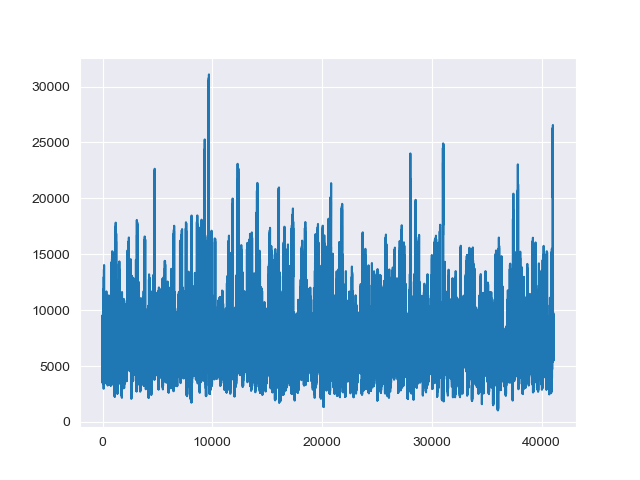

In [336]:
%matplotlib notebook
plt.plot(np.mean( y_pred_tot_s1,0))

In [ ]:
test1=test.merge(store,on="Store")
test1[test1.Open.isnull()]
test1.loc[ test1.Open.isnull(), 'Open' ] = 1
test1.columns

In [369]:
pred=rf.predict(np.array(test1.drop(columns=["Date","StateHoliday","Id","DayOfWeek"])))#use when 
test1["sales"]=pred                                            #not using k fold method
result=pd.DataFrame()
result["Id"]=test1.Id
result["Sales"]=test1["sales"]
# result["Sales"]=np.mean( y_pred_tot_s1,0) #used incase using k fold predictions
result=result.sort_values(by="Id")
result

,Id,Sales
0,1,4352.798667
48,2,7652.633222
96,3,8983.330246
144,4,8117.848774
192,5,7495.531290
240,6,5761.801770
288,7,8197.656369
336,8,8243.504357
384,9,5604.399516
432,10,5699.416798


In [370]:
result.to_csv("resulttest3-3-03.csv", index = False )